In [42]:
import pandas as pd
from matplotlib import pyplot as plt

In [43]:
filename = 'results.csv'
df = pd.read_csv(filename, index_col=0)


In [44]:
df.head()

,OriginalQuestion,TypoQuestion,TargetWord,TypoWord,EditDistance,TargetStartIndex,TargetEndIndex,p,LogProbWord,Question,StartIndex,EndIndex,AnswerChoices,CorrectAnswer,Answer,Correct,Valid
0,The sanctions against the school were a punish...,The sanctions against the school were a punish...,punishing,punishing,0,40,49,0.0,0.000004,The sanctions against the school were a punish...,40,49,"['A) ignore', 'B) enforce', 'C) authoritarian'...",A) ignore,B) enforce,False,True
1,The sanctions against the school were a punish...,The sanctions against the school were a punish...,punishing,punishing,0,40,49,0.1,0.000004,The sanctions against the school were a punish...,40,49,"['A) ignore', 'B) enforce', 'C) authoritarian'...",A) ignore,B) enforce,False,True
2,The sanctions against the school were a punish...,The sanctions against the school were a punish...,punishing,punishing,0,40,49,0.2,0.000004,The sanctions against the school were a punish...,40,49,"['A) ignore', 'B) enforce', 'C) authoritarian'...",A) ignore,B) enforce,False,True
3,The sanctions against the school were a punish...,The sanctions against the school were a punnhi...,punishing,punnhihng,3,40,49,0.4,0.000004,The sanctions against the school were a punish...,40,49,"['A) ignore', 'B) enforce', 'C) authoritarian'...",A) ignore,B) enforce,False,True
4,The sanctions against the school were a punish...,The sanctions against the school were a pihhq ...,punishing,pihhq,6,40,45,0.8,0.000004,The sanctions against the school were a punish...,40,49,"['A) ignore', 'B) enforce', 'C) authoritarian'...",A) ignore,B) enforce,False,True


In [45]:
df['NormalizedEditDistance'] = df.apply(lambda row: row['EditDistance'] / (row['EndIndex'] - row['StartIndex']), axis=1)

In [ ]:
df[['Correct', 'LogProbWord']].groupby('LogProbWord').mean().sort_values('LogProbWord').head(50)

In [48]:
df[['Correct', 'EditDistance']].groupby('EditDistance').mean().sort_values('EditDistance')

,Correct
EditDistance,
0,0.786106
1,0.750000
2,0.752525
3,0.714286
4,0.759690
5,0.763889
6,0.655172
7,0.809524
8,0.653846


In [57]:
df[df['Correct'] == True]['NormalizedEditDistance'].mean(), df[df['Correct'] == False]['NormalizedEditDistance'].mean()

(0.26448615757167565, 0.29366474392896297)

In [56]:
df[df['Correct'] == True]['NormalizedEditDistance'].mean(), df[df['Correct'] == False]['NormalizedEditDistance'].mean()


0.29366474392896297

In [58]:
df[df['Correct'] == True]['EditDistance'].mean(), df[df['Correct'] == False]['EditDistance'].mean()


(2.0097517730496453, 2.486559139784946)

In [59]:
df[df['Correct'] == True]['LogProbWord'].mean(), df[df['Correct'] == False]['LogProbWord'].mean()


(0.07475913193703537, 0.054511348447474565)

In [60]:
df[df['Correct'] == True]['p'].mean(), df[df['Correct'] == False]['p'].mean()


(0.2921985815602837, 0.32365591397849464)

### Idenfity where typo makes answer incorrect

In [61]:
df.head()

,OriginalQuestion,TypoQuestion,TargetWord,TypoWord,EditDistance,TargetStartIndex,TargetEndIndex,p,LogProbWord,Question,StartIndex,EndIndex,AnswerChoices,CorrectAnswer,Answer,Correct,Valid,NormalizedEditDistance
0,The sanctions against the school were a punish...,The sanctions against the school were a punish...,punishing,punishing,0,40,49,0.0,0.000004,The sanctions against the school were a punish...,40,49,"['A) ignore', 'B) enforce', 'C) authoritarian'...",A) ignore,B) enforce,False,True,0.000000
1,The sanctions against the school were a punish...,The sanctions against the school were a punish...,punishing,punishing,0,40,49,0.1,0.000004,The sanctions against the school were a punish...,40,49,"['A) ignore', 'B) enforce', 'C) authoritarian'...",A) ignore,B) enforce,False,True,0.000000
2,The sanctions against the school were a punish...,The sanctions against the school were a punish...,punishing,punishing,0,40,49,0.2,0.000004,The sanctions against the school were a punish...,40,49,"['A) ignore', 'B) enforce', 'C) authoritarian'...",A) ignore,B) enforce,False,True,0.000000
3,The sanctions against the school were a punish...,The sanctions against the school were a punnhi...,punishing,punnhihng,3,40,49,0.4,0.000004,The sanctions against the school were a punish...,40,49,"['A) ignore', 'B) enforce', 'C) authoritarian'...",A) ignore,B) enforce,False,True,0.333333
4,The sanctions against the school were a punish...,The sanctions against the school were a pihhq ...,punishing,pihhq,6,40,45,0.8,0.000004,The sanctions against the school were a punish...,40,49,"['A) ignore', 'B) enforce', 'C) authoritarian'...",A) ignore,B) enforce,False,True,0.666667


In [74]:
hard_question_indices = []
for idx in range(0, len(df), 5):
    print()
    print(idx)
    if df.iloc[idx]['Correct'] == True:
        print('Correct:', df.iloc[idx]['Answer'])
        for i in range(idx+1, idx+4):
            if df.iloc[i]['Correct'] == False and df.iloc[i]['Valid'] == True:
                print(i)
                print('Incorrect:', df.iloc[i]['Answer'])
                hard_question_indices.append(idx)
                break
            


0

5
Correct: B) populated areas

10

15
Correct: D) atlas

20
Correct: C) natural habitat

25
Correct: B) refrigerator

30
Correct: D) business sector

35
Correct: C) garden

40
Correct: A) loss of heat
41
Incorrect: E) calm down

45
Correct: C) kitchen

50
Correct: D) Louisiana

55
Correct: D) food court

60

65

70

75
Correct: D) computer network

80

85
Correct: C) being found out

90
Correct: A) television

95
Correct: B) subdivision

100
Correct: D) light fire

105
Correct: C) saturated with water
108
Incorrect: E) crumpled

110

115
Correct: E) government
118
Incorrect: B) white house

120
Correct: D) wildlife refuge
123
Incorrect: B) open country

125
Correct: B) dangerous

130
Correct: E) social bonding
131
Incorrect: B) communication

135

140

145
Correct: D) proximity

150
Correct: A) demonstration

155
Correct: A) military base

160
Correct: C) feel safe

165

170
Correct: A) headache

175

180
Correct: C) millpond
182
Incorrect: E) lake or river

185
Correct: A) reach t

In [72]:
len(hard_question_indices)

39

In [73]:
hard_question_indices

[40,
 105,
 115,
 120,
 130,
 180,
 210,
 295,
 300,
 310,
 325,
 425,
 455,
 510,
 530,
 535,
 540,
 685,
 725,
 825,
 865,
 950,
 1035,
 1060,
 1070,
 1095,
 1145,
 1170,
 1230,
 1245,
 1310,
 1340,
 1420,
 1435,
 1445,
 1460,
 1470,
 1480,
 1495]

In [78]:
results = pd.read_csv('results_experiment_2_2.csv', index_col=0)
results.head()

,QuestionId,OriginalQuestion,TypoQuestion,TargetWord,TypoWord,EditDistance,TargetStartIndex,TargetEndIndex,p,LogProbWord,...,CorrectedQuestion,Correct,Valid,CorrectedCorrect,CorrectInt,CorrectedCorrectInt,PositiveChangeCorrection,NegativeChangeCorrection,BaseCorrect,Filtered
0,1,The sanctions against the school were a punish...,The sanctions against the school were a punish...,punishing,punishing,0,40,49,0.0,-5.41,...,The sanctions against the school were a punish...,False,True,False,0,0,0,0,0,NaN
1,1,The sanctions against the school were a punish...,The sanctions against the school were a zunish...,punishing,zunishing,1,40,49,0.1,-5.41,...,The sanctions against the school were a punish...,False,True,False,0,0,0,0,0,NaN
2,1,The sanctions against the school were a punish...,The sanctions against the school were a piushi...,punishing,piushign,5,40,48,0.2,-5.41,...,The sanctions against the school were a punish...,False,True,False,0,0,0,0,0,NaN
3,1,The sanctions against the school were a punish...,The sanctions against the school were a punssi...,punishing,punssing,2,40,48,0.3,-5.41,...,The sanctions against the school were a punish...,False,True,False,0,0,0,0,0,NaN
4,1,The sanctions against the school were a punish...,The sanctions against the school were a puoish...,punishing,puoishing,1,40,49,0.4,-5.41,...,The sanctions against the school were a punish...,False,True,False,0,0,0,0,0,NaN


In [79]:
results = results[results['Filtered'] == 1]
results.head()

,QuestionId,OriginalQuestion,TypoQuestion,TargetWord,TypoWord,EditDistance,TargetStartIndex,TargetEndIndex,p,LogProbWord,...,CorrectedQuestion,Correct,Valid,CorrectedCorrect,CorrectInt,CorrectedCorrectInt,PositiveChangeCorrection,NegativeChangeCorrection,BaseCorrect,Filtered
7,2,Sammy wanted to go to where the people were. ...,Sammy wanted to go to where the epople were. ...,people,epople,2,32,38,0.1,-1.92,...,Sammy wanted to go to where the people were. W...,True,True,True,1,1,0,0,1,1.0
8,2,Sammy wanted to go to where the people were. ...,Sammy wanted to go to where the dpm were. Whe...,people,dpm,5,32,35,0.2,-1.92,...,Sammy wanted to go to where the damp were. Whe...,True,True,True,1,1,0,0,1,1.0
9,2,Sammy wanted to go to where the people were. ...,Sammy wanted to go to where the peolpe were. ...,people,peolpe,2,32,38,0.3,-1.92,...,Sammy wanted to go to where the people were. W...,True,True,True,1,1,0,0,1,1.0
10,2,Sammy wanted to go to where the people were. ...,Sammy wanted to go to where the ppje were. Wh...,people,ppje,3,32,36,0.4,-1.92,...,Sammy wanted to go to where the people were. W...,True,True,True,1,1,0,0,1,1.0
11,2,Sammy wanted to go to where the people were. ...,Sammy wanted to go to where the pevel were. W...,people,pevel,3,32,37,0.5,-1.92,...,Sammy wanted to go to where the people were. W...,True,True,True,1,1,0,0,1,1.0


In [80]:
results

,QuestionId,OriginalQuestion,TypoQuestion,TargetWord,TypoWord,EditDistance,TargetStartIndex,TargetEndIndex,p,LogProbWord,...,CorrectedQuestion,Correct,Valid,CorrectedCorrect,CorrectInt,CorrectedCorrectInt,PositiveChangeCorrection,NegativeChangeCorrection,BaseCorrect,Filtered
7,2,Sammy wanted to go to where the people were. ...,Sammy wanted to go to where the epople were. ...,people,epople,2,32,38,0.1,-1.92,...,Sammy wanted to go to where the people were. W...,True,True,True,1,1,0,0,1,1.0
8,2,Sammy wanted to go to where the people were. ...,Sammy wanted to go to where the dpm were. Whe...,people,dpm,5,32,35,0.2,-1.92,...,Sammy wanted to go to where the damp were. Whe...,True,True,True,1,1,0,0,1,1.0
9,2,Sammy wanted to go to where the people were. ...,Sammy wanted to go to where the peolpe were. ...,people,peolpe,2,32,38,0.3,-1.92,...,Sammy wanted to go to where the people were. W...,True,True,True,1,1,0,0,1,1.0
10,2,Sammy wanted to go to where the people were. ...,Sammy wanted to go to where the ppje were. Wh...,people,ppje,3,32,36,0.4,-1.92,...,Sammy wanted to go to where the people were. W...,True,True,True,1,1,0,0,1,1.0
11,2,Sammy wanted to go to where the people were. ...,Sammy wanted to go to where the pevel were. W...,people,pevel,3,32,37,0.5,-1.92,...,Sammy wanted to go to where the people were. W...,True,True,True,1,1,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,247,Where could you find a fox hunting when not in...,Where could you find a fp hunting when not in ...,fox,fp,2,23,25,0.4,-2.04,...,Where could you find a fox hunting when not in...,False,True,True,0,1,1,0,1,1.0
1481,247,Where could you find a fox hunting when not in...,Where could you find a fxx hunting when not in...,fox,fxx,1,23,26,0.5,-2.04,...,Where could you find a fox hunting when not in...,False,True,True,0,1,1,0,1,1.0
1484,248,Why might a person go to get counseling?,Why might a perrson go to get counseling?,person,perrson,1,12,19,0.2,-0.86,...,Why might a person go to get counseling?,False,True,True,0,1,1,0,1,1.0
1486,248,Why might a person go to get counseling?,Why might a pegrn go to get counseling?,person,pegrn,3,12,17,0.4,-0.86,...,Why might a person go to get counseling?,True,True,False,1,0,0,1,1,1.0


/var/folders/_6/_8xn00vj0gz5g10qr8khtxz40000gn/T/ipykernel_88206/1790367992.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_correct_int = results.groupby('Bin')['CorrectInt'].mean()


<AxesSubplot: xlabel='Bin'>

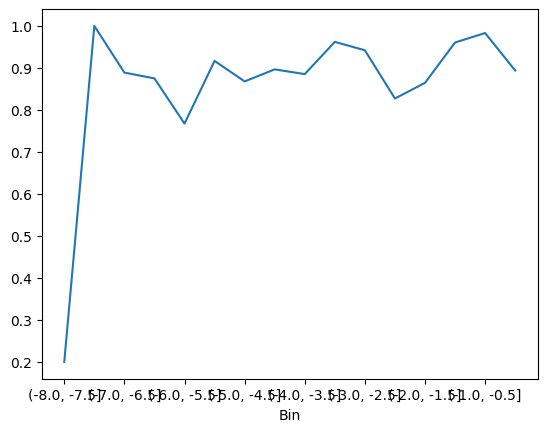

In [87]:
import numpy as np

# Define the bin edges
bin_edges = np.arange(-8, 0.5, 0.5)

# Create a new column 'Bin' in the dataframe to store the bin labels
results['Bin'] = pd.cut(results['LogProbWord'], bins=bin_edges)

# Calculate the average CorrectInt for each bin
avg_correct_int = results.groupby('Bin')['CorrectInt'].mean()

# Plot the data
avg_correct_int.plot()


<AxesSubplot: >

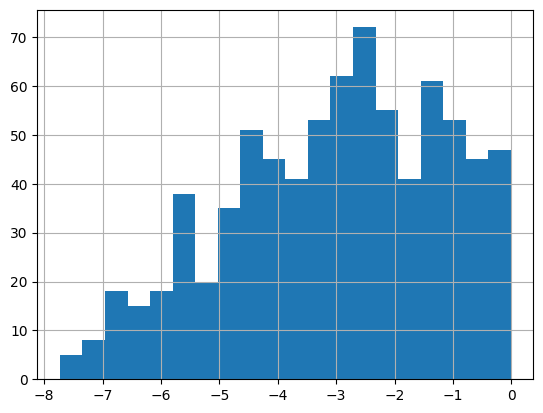

In [88]:
results['LogProbWord'].hist(bins=20)

In [236]:
for num in np.arange(-8, 1, 1):
    print(num)
    print(results[(num - .5 < results['LogProbWord']) & (results['LogProbWord'] < num + .5)]['CorrectInt'].mean())
    print()

-8
0.42857142857142855

-7
0.8918918918918919

-6
0.8296703296703297

-5
0.8231292517006803

-4
0.8949771689497716

-3
0.8925619834710744

-2
0.8985849056603774

-1
0.9354838709677419

0
0.9717514124293786



In [237]:
results = pd.read_csv('results_experiment_4.csv')
results['NormalizedEditDistance'] = results.apply(lambda row: row['EditDistance'] / (row['EndIndex'] - row['StartIndex']), axis=1)
results

,Unnamed: 0,OriginalQuestion,TypoQuestion,TargetWord,TypoWord,EditDistance,TargetStartIndex,TargetEndIndex,p,Id,...,CorrectAnswer,Answer,Correct,Valid,CorrectedQuestion,CorrectedAnswer,CorrectedCorrect,CorrectInt,CorrectedCorrectInt,NormalizedEditDistance
0,0,The sanctions against the school were a punish...,The sanctions against the school were a punish...,punishing,punishing,0,40,49,0.0,0,...,A) ignore,A) ignore,True,True,The sanctions against the school were a punish...,A) ignore,True,1,1,0.000000
1,1,The sanctions against the school were a punish...,The sanctions against the school were a pusihn...,punishing,pusihng,3,40,47,0.2,0,...,A) ignore,B) enforce,False,True,The sanctions against the school were a crushi...,B) enforce,False,0,0,0.333333
2,2,The sanctions against the school were a punish...,The sanctions against the school were a punich...,punishing,punichin,2,40,48,0.4,0,...,A) ignore,B) enforce,False,True,The sanctions against the school were a punish...,A) ignore,True,0,1,0.222222
3,3,The sanctions against the school were a punish...,The sanctions against the school were a puunsz...,punishing,puunszzy,6,40,48,0.8,0,...,A) ignore,B) enforce,False,True,The sanctions against the school were a punish...,A) ignore,True,0,1,0.666667
4,4,Sammy wanted to go to where the people were. ...,Sammy wanted to go to where the people were. ...,people,people,0,32,38,0.0,1,...,B) populated areas,B) populated areas,True,True,Sammy wanted to go to where the people were. W...,B) populated areas,True,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,3221,"The team was able to communicate effectively, ...","The team was able to communicate effectively, ...",communicate,communicate,0,21,32,0.0,999,...,D) think,D) think,True,True,"The team was able to communicate effectively, ...",D) think,True,1,1,0.000000
3222,3222,"The team was able to communicate effectively, ...","The team was able to colmulicate effectively, ...",communicate,colmulicate,2,21,32,0.1,999,...,D) think,D) think,True,True,"The team was able to communicate effectively, ...",D) think,True,1,1,0.181818
3223,3223,"The team was able to communicate effectively, ...","The team was able to cojmunnicate effectively,...",communicate,cojmunnicate,2,21,33,0.2,999,...,D) think,D) think,True,True,"The team was able to communicate effectively, ...",D) think,True,1,1,0.181818
3224,3224,"The team was able to communicate effectively, ...",The team was able to commmuvcoaate effectively...,communicate,commmuvcoaate,5,21,34,0.4,999,...,D) think,D) think,True,True,"The team was able to communicate effectively, ...",D) think,True,1,1,0.454545


In [238]:
results = results[results['p'] != 0]

<AxesSubplot: >

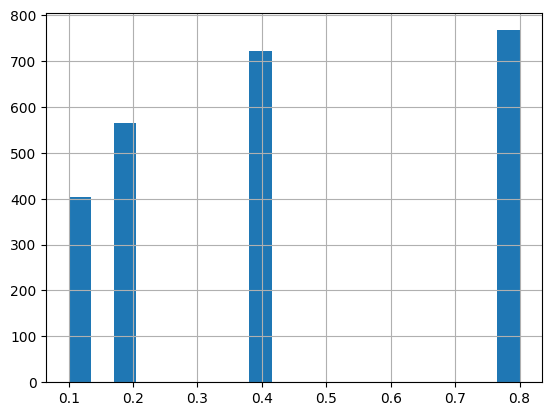

In [239]:
results['p'].hist(bins=20)

In [262]:
import plotly.express as px

# Define the bin edges
bin_edges = np.arange(-8, 1, 1)

# Create a new column 'Bin' in the dataframe to store the bin labels
results['Bin'] = pd.cut(results['LogProbWord'], bins=bin_edges)

# Calculate the average CorrectInt and sample size for each bin
avg_correct_int = results.groupby('Bin')['CorrectInt'].mean()
sample_size = results.groupby('Bin').size()

# Convert the bin labels to strings for plotting
avg_correct_int.index = avg_correct_int.index.astype(str)

# Create a scatter plot with Plotly Express
fig = px.scatter(x=avg_correct_int.index, y=avg_correct_int.values, size=sample_size.values)

# Update plot labels
fig.update_layout(
    title='QA Accuracy by Log Prob Word',
    xaxis_title='Log Prob Word',
    yaxis_title='Accuracy'
)

# make fig less wide
fig.update_layout(
    width=700,
    height=480
)


# Show the plot
fig.show()

# write fig to html
fig.write_html("log_prob_word.html")

/var/folders/_6/_8xn00vj0gz5g10qr8khtxz40000gn/T/ipykernel_88206/3936681923.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_6/_8xn00vj0gz5g10qr8khtxz40000gn/T/ipykernel_88206/3936681923.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/_6/_8xn00vj0gz5g10qr8khtxz40000gn/T/ipykernel_88206/3936681923.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence t

In [263]:
import plotly.express as px

# Define the bin edges
bin_edges = np.arange(0, 1.1, .1)


# Create a new column 'Bin' in the dataframe to store the bin labels
results['Bin'] = pd.cut(results['NormalizedEditDistance'], bins=bin_edges)

# Calculate the average CorrectInt and sample size for each bin
avg_correct_int = results.groupby('Bin')['CorrectInt'].mean()
sample_size = results.groupby('Bin').size()

# Convert the bin labels to strings for plotting
avg_correct_int.index = avg_correct_int.index.astype(str)

# Create a scatter plot with Plotly Express
fig = px.scatter(x=avg_correct_int.index, y=avg_correct_int.values, size=sample_size.values)

# Update plot labels
fig.update_layout(
    title='QA Accuracy by Normalized Edit Distance',
    xaxis_title='Normalized Edit Distance',
    yaxis_title='Accuracy'
)

# make fig less wide
fig.update_layout(
    width=700,
    height=480
)
# rotate x axis labels
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

# write fig to html
fig.write_html("edit_distance.html")

/var/folders/_6/_8xn00vj0gz5g10qr8khtxz40000gn/T/ipykernel_88206/1117978619.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_6/_8xn00vj0gz5g10qr8khtxz40000gn/T/ipykernel_88206/1117978619.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/_6/_8xn00vj0gz5g10qr8khtxz40000gn/T/ipykernel_88206/1117978619.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence t

In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the bin edges for LogProbWord and NormalizedEditDistance
logprobword_bins = [-8, -6, -4.5, -3, -1.5, 0]
normalizededitdistance_bins = [0, .2, .4, .6, .8, 1]


/var/folders/_6/_8xn00vj0gz5g10qr8khtxz40000gn/T/ipykernel_88206/2419999184.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_6/_8xn00vj0gz5g10qr8khtxz40000gn/T/ipykernel_88206/2419999184.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_6/_8xn00vj0gz5g10qr8khtxz40000gn/T/ipykernel_88206/2419999184.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser

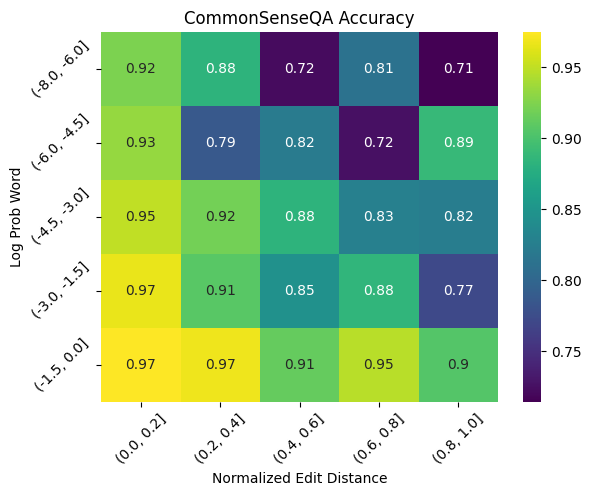

In [243]:
# Bin the results based on LogProbWord and NormalizedEditDistance
results['LogProbWordBin'] = pd.cut(results['LogProbWord'], bins=logprobword_bins)
results['NormalizedEditDistanceBin'] = pd.cut(results['NormalizedEditDistance'], bins=normalizededitdistance_bins)

# Calculate the average CorrectInt for each bin
avg_correct_int = results.groupby(['LogProbWordBin', 'NormalizedEditDistanceBin'])['CorrectInt'].mean().reset_index()

# Pivot the data for heatmap
heatmap_data = avg_correct_int.pivot(index="LogProbWordBin", columns="NormalizedEditDistanceBin", values="CorrectInt")

# Create the heatmap
sns.heatmap(heatmap_data, cmap="viridis", annot=True)


# Set labels and title
plt.xlabel('Normalized Edit Distance')
# change xtick labels manually
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel('Log Prob Word')
plt.title('CommonSenseQA Accuracy')

# Show the plot
plt.show()

/var/folders/_6/_8xn00vj0gz5g10qr8khtxz40000gn/T/ipykernel_88206/2710689772.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_6/_8xn00vj0gz5g10qr8khtxz40000gn/T/ipykernel_88206/2710689772.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_6/_8xn00vj0gz5g10qr8khtxz40000gn/T/ipykernel_88206/2710689772.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser

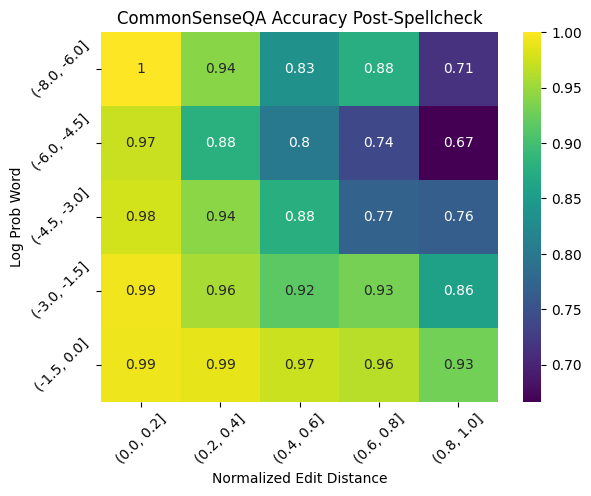

In [244]:
# Bin the results based on LogProbWord and NormalizedEditDistance
results['LogProbWordBin'] = pd.cut(results['LogProbWord'], bins=logprobword_bins)
results['NormalizedEditDistanceBin'] = pd.cut(results['NormalizedEditDistance'], bins=normalizededitdistance_bins)

# Calculate the average CorrectInt for each bin
avg_correct_int = results.groupby(['LogProbWordBin', 'NormalizedEditDistanceBin'])['CorrectedCorrectInt'].mean().reset_index()

# Pivot the data for heatmap
heatmap_data = avg_correct_int.pivot(index="LogProbWordBin", columns="NormalizedEditDistanceBin", values="CorrectedCorrectInt")

# Create the heatmap
sns.heatmap(heatmap_data, cmap="viridis", annot=True)


# Set labels and title
plt.xlabel('Normalized Edit Distance')
# change xtick labels manually
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel('Log Prob Word')
plt.title('CommonSenseQA Accuracy Post-Spellcheck')

# Show the plot
plt.show()

In [245]:
results['CorrectInt'].mean(), results['CorrectedCorrectInt'].mean()

(0.888120423108218, 0.919853539462978)